# Import Libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.optim as optim

# Import Datasets

In [2]:
GTrain = pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
GTrain.shape

(1258, 6)

In [4]:
GTrain.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
GTrain.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [6]:
GTrain.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
GTest = pd.read_csv("Google_Stock_Price_Test.csv")

In [8]:
GTest.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [9]:
GTest.describe()

,Open,High,Low,Close
count,20.000000,20.000000,20.000000,20.000000
mean,807.526000,811.926500,801.949500,807.904500
std,15.125428,14.381198,13.278607,13.210088
min,778.810000,789.630000,775.800000,786.140000
25%,802.965000,806.735000,797.427500,802.282500
50%,806.995000,808.640000,801.530000,806.110000
75%,809.560000,817.097500,804.477500,810.760000
max,837.810000,841.950000,827.010000,835.670000


In [10]:
GTest.shape

(20, 6)

In [11]:
GTest.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Merge the datasets

In [12]:
GTrain['Date'] = pd.to_datetime(GTrain['Date'], format='%m/%d/%Y')
GTest['Date'] = pd.to_datetime(GTest['Date'], format='%m/%d/%Y')


In [13]:
# Replace commas with empty string in GTrain
GTrain = GTrain.replace(',', '', regex=True)

# Replace commas with empty string in GTest
GTest = GTest.replace(',', '', regex=True)


In [14]:
print(GTrain.dtypes)
print(GTest.dtypes)

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close             object
Volume            object
dtype: object
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object


In [15]:
GTrain['Close'] = GTrain['Close'].astype(float)

In [16]:
GTrain['Volume'] = GTrain['Volume'].astype(float)
GTest['Volume'] = GTest['Volume'].astype(float)

In [17]:
print(GTrain.dtypes)
print(GTest.dtypes)

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object


In [18]:
GTrain = pd.read_csv('Google_Stock_Price_Train.csv', index_col='Date', parse_dates=True)
GTest = pd.read_csv('Google_Stock_Price_Test.csv', index_col='Date', parse_dates=True)

df = pd.concat([GTrain, GTest], axis=0)


In [19]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [20]:
df.replace(',', '', regex=True)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500
2012-01-04,331.27,333.87,329.08,666.45,5749400
2012-01-05,329.83,330.75,326.89,657.21,6590300
2012-01-06,328.34,328.77,323.68,648.24,5405900
2012-01-09,322.04,322.29,309.46,620.76,11688800
...,...,...,...,...,...
2017-01-25,829.62,835.77,825.06,835.67,1494500
2017-01-26,837.81,838.00,827.01,832.15,2973900
2017-01-27,834.71,841.95,820.44,823.31,2965800


# Graph Of Dataset

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

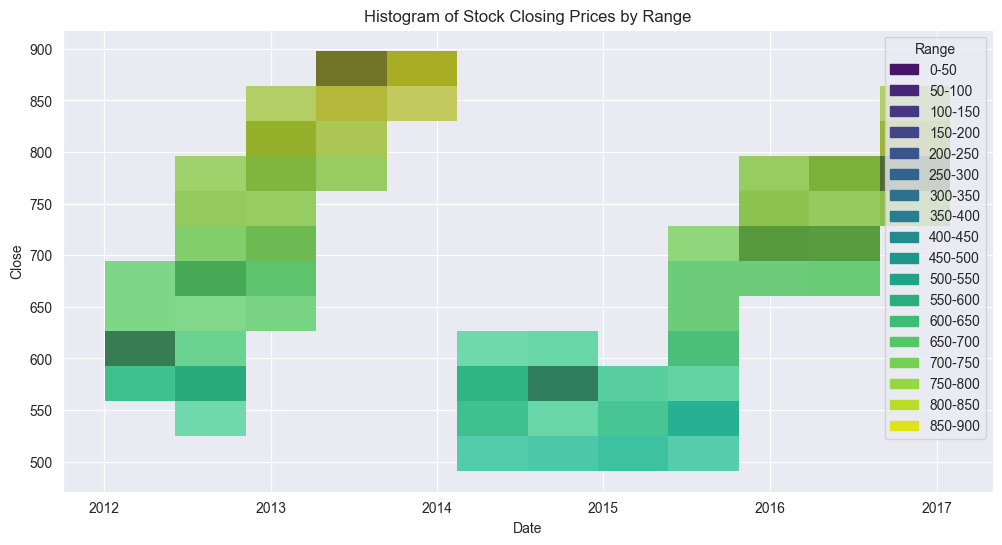

In [22]:
# Define list of y-axis limits for different ranges
y_limits = [(0, 50), (50, 100), (100, 150), (150, 200), (200, 250), (250, 300), (300, 350), (350, 400), (400, 450), (450, 500), (500, 550), (550, 600), (600, 650), (650, 700), (700, 750), (750, 800), (800, 850), (850, 900)]
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df = df.dropna(subset=['Close'])
df['Range'] = pd.cut(df['Close'], bins=[y_min for y_min, y_max in y_limits] + [y_max for y_min, y_max in y_limits[-1:]], include_lowest=True, labels=[f'{y_min}-{y_max}' for y_min, y_max in y_limits])


# Group data by range and plot histogram for each group
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Date', y='Close', hue='Range', palette='viridis')

# Set title for plot
plt.title('Histogram of Stock Closing Prices by Range')

# Display the plot
plt.show()

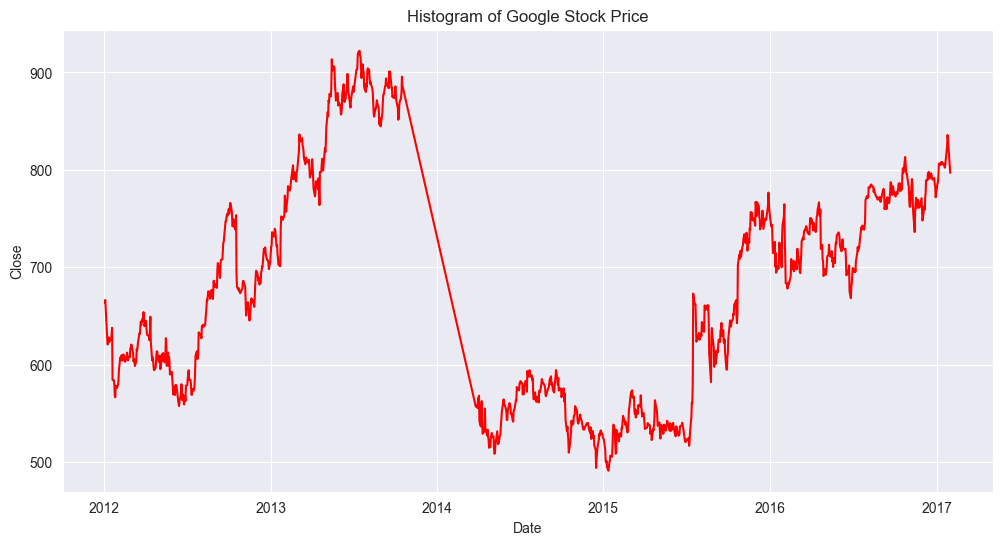

In [23]:

sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Close', color='red')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Histogram of Google Stock Price')
plt.show()

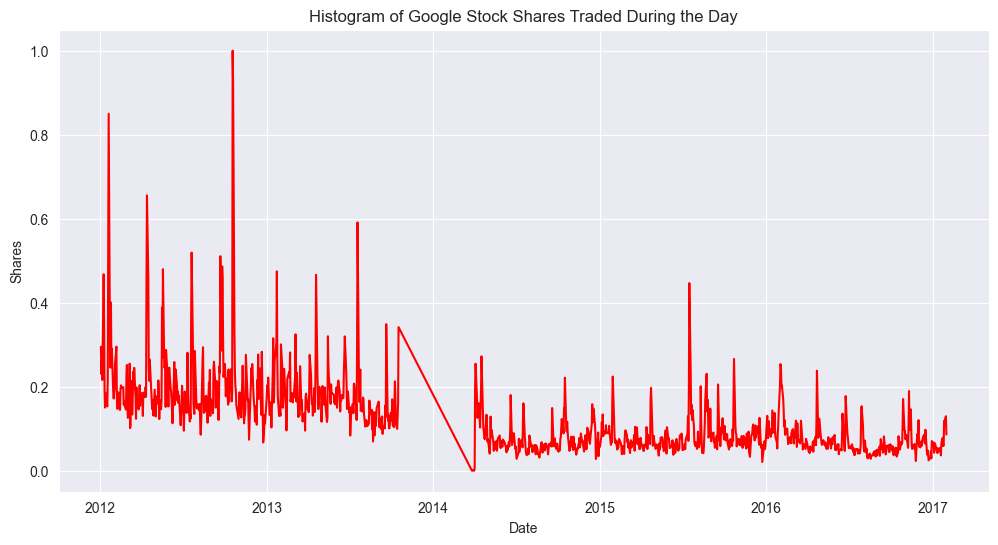

In [192]:

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Volume', color='red')
plt.xlabel('Date')
plt.ylabel('Shares')
plt.title('Histogram of Google Stock Shares Traded During the Day')
plt.show()


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
df = df.drop('Range', axis=1)

In [27]:
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

In [28]:
print(df.dtypes)

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


In [29]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0


In [30]:
df.Volume

Date
2012-01-03     7380500.0
2012-01-04     5749400.0
2012-01-05     6590300.0
2012-01-06     5405900.0
2012-01-09    11688800.0
                 ...    
2017-01-25     1494500.0
2017-01-26     2973900.0
2017-01-27     2965800.0
2017-01-30     3246600.0
2017-01-31     2160600.0
Name: Volume, Length: 1169, dtype: float64

In [31]:
# Normalize the columns
scaler = MinMaxScaler()
normalized_cols = ['Close', 'Open', 'Volume', 'High', 'Low']
df[normalized_cols] = scaler.fit_transform(df[normalized_cols])

In [32]:
# Concatenate the normalized columns
data = df[normalized_cols]
data.shape

(1169, 5)

In [33]:
data.head()

,Close,Open,Volume,High,Low
Date,,,,,
2012-01-03,0.400014,0.082568,0.295258,0.092057,0.086851
2012-01-04,0.406650,0.093343,0.229936,0.093912,0.094327
2012-01-05,0.385210,0.090766,0.263612,0.088348,0.090344
2012-01-06,0.364396,0.088099,0.216179,0.084816,0.084505
2012-01-09,0.300631,0.076823,0.467797,0.073260,0.058641


# Split data into training, validation, and testing sets

In [34]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.15)
test_size = int(len(data) * 0.15)


In [35]:
print(train_size)

818


In [36]:
print(val_size)

175


In [37]:
print(test_size)

175


In [38]:
train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[-test_size:]

In [39]:
train_data.shape

(818, 5)

In [40]:
test_data.shape

(175, 5)

# Define a function to create input sequences and corresponding labels

In [41]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :])
        y.append(data[i, :])
    X = np.array(X)
    y = np.array(y)
    if len(X.shape) == 2:
        X = np.expand_dims(X, axis=2)
    return X, y

In [42]:
# Define the length of the input sequences
seq_length = 30

# Create input sequences and labels for training, validation, and testing sets

In [43]:
X, y = create_sequences(data.values, seq_length)

In [44]:
train_X = torch.Tensor(X[:train_size])
train_y = torch.Tensor(y[:train_size])

val_X = torch.Tensor(X[train_size:train_size+val_size])
val_y = torch.Tensor(y[train_size:train_size+val_size])

test_X = torch.Tensor(X[train_size+val_size:])
test_y = torch.Tensor(y[train_size+val_size:])

# Define the LSTM model

In [180]:
class LSTM(nn.Module):
    def __init__(self, input_size=5, hidden_size=60, num_layers=5, dropout=0.1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(hidden_size, 5)
        self.relu = nn.ReLU()
        self.dense = nn.Linear(5, 5)
        self.activation = nn.ReLU()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out)
        out = self.linear(out[:, -1, :])
        out = self.relu(out)
        out = self.dense(out)
        out = self.activation(out)
        return out


# Define the model hyperparameters

In [181]:
input_size = 5 # number of features (Open, High, Low, Close, Volume)
hidden_size = 60 # number of LSTM cells
num_layers = 5# number of LSTM layers
learning_rate = 0.001
num_epochs = 700

In [182]:
# Initialize the LSTM model with dropout
model = LSTM(input_size, hidden_size, num_layers, dropout=0.1)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(), lr=learning_rate)



In [183]:
train_X = torch.tensor(train_X).float()
train_y = torch.tensor(train_y).float()
val_X = torch.tensor(val_X).float()
val_y = torch.tensor(val_y).float()
test_X = torch.tensor(test_X).float()
test_y = torch.tensor(test_y).float()
# convert the NumPy array to a PyTorch tensor

C:\Users\User\AppData\Local\Temp\ipykernel_5368\2751023800.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_X = torch.tensor(train_X).float()
C:\Users\User\AppData\Local\Temp\ipykernel_5368\2751023800.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(train_y).float()
C:\Users\User\AppData\Local\Temp\ipykernel_5368\2751023800.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_X = torch.tensor(val_X).float()
C:\Users\User\AppData\Local\Temp\ipykernel_5368\2751023800.py:4: UserWarning: To copy construct

In [184]:
print(train_X.shape)

torch.Size([818, 30, 5])


In [185]:
print(train_X)

tensor([[[0.4000, 0.0826, 0.2953, 0.0921, 0.0869],
         [0.4067, 0.0933, 0.2299, 0.0939, 0.0943],
         [0.3852, 0.0908, 0.2636, 0.0883, 0.0903],
         ...,
         [0.2623, 0.0424, 0.1866, 0.0387, 0.0430],
         [0.2769, 0.0447, 0.1457, 0.0438, 0.0485],
         [0.2712, 0.0457, 0.1447, 0.0422, 0.0437]],

        [[0.4067, 0.0933, 0.2299, 0.0939, 0.0943],
         [0.3852, 0.0908, 0.2636, 0.0883, 0.0903],
         [0.3644, 0.0881, 0.2162, 0.0848, 0.0845],
         ...,
         [0.2769, 0.0447, 0.1457, 0.0438, 0.0485],
         [0.2712, 0.0457, 0.1447, 0.0422, 0.0437],
         [0.2615, 0.0469, 0.1947, 0.0430, 0.0417]],

        [[0.3852, 0.0908, 0.2636, 0.0883, 0.0903],
         [0.3644, 0.0881, 0.2162, 0.0848, 0.0845],
         [0.3006, 0.0768, 0.4678, 0.0733, 0.0586],
         ...,
         [0.2712, 0.0457, 0.1447, 0.0422, 0.0437],
         [0.2615, 0.0469, 0.1947, 0.0430, 0.0417],
         [0.2637, 0.0379, 0.2032, 0.0393, 0.0373]],

        ...,

        [[0.2541, 0.

In [186]:
print(torch.min(train_X))
print(torch.max(train_X))

tensor(0.)
tensor(1.)


# Train the model

In [187]:
# Train the LSTM model
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()

    # Reset the optimizer gradients
    optimizer.zero_grad()

    # Forward pass
    output = model(train_X)

    # Compute the loss
    loss = criterion(output, train_y)

    # Compute the accuracy
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(train_y.argmax(dim=1, keepdim=True)).sum().item()
    accuracy = correct / len(train_y)

    # Backward pass
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # Print the loss and accuracy every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

Epoch [1/700], Loss: 2.3908, Accuracy: 0.4866
Epoch [2/700], Loss: 2.3892, Accuracy: 0.4804
Epoch [3/700], Loss: 2.3880, Accuracy: 0.4633
Epoch [4/700], Loss: 2.3874, Accuracy: 0.4707
Epoch [5/700], Loss: 2.3872, Accuracy: 0.4768
Epoch [6/700], Loss: 2.3871, Accuracy: 0.4841
Epoch [7/700], Loss: 2.3869, Accuracy: 0.4878
Epoch [8/700], Loss: 2.3868, Accuracy: 0.4853
Epoch [9/700], Loss: 2.3866, Accuracy: 0.4853
Epoch [10/700], Loss: 2.3864, Accuracy: 0.4866
Epoch [11/700], Loss: 2.3863, Accuracy: 0.4878
Epoch [12/700], Loss: 2.3863, Accuracy: 0.4866
Epoch [13/700], Loss: 2.3862, Accuracy: 0.4866
Epoch [14/700], Loss: 2.3861, Accuracy: 0.4866
Epoch [15/700], Loss: 2.3860, Accuracy: 0.4866
Epoch [16/700], Loss: 2.3858, Accuracy: 0.4866
Epoch [17/700], Loss: 2.3855, Accuracy: 0.4866
Epoch [18/700], Loss: 2.3851, Accuracy: 0.4866
Epoch [19/700], Loss: 2.3849, Accuracy: 0.4866
Epoch [20/700], Loss: 2.3842, Accuracy: 0.4866
Epoch [21/700], Loss: 2.3834, Accuracy: 0.4927
Epoch [22/700], Loss: 

# Evaluate the LSTM model on the validation set

In [188]:
with torch.no_grad():
    # Set the model to evaluation mode
    model.eval()

    # Forward pass
    output = model(val_X)

    # Compute the loss
    loss = criterion(output, val_y)

    # Compute the accuracy
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(val_y.argmax(dim=1, keepdim=True)).sum().item()
    accuracy = correct / len(val_y)

    # Print the loss and accuracy
    print(f'Validation Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')


Validation Loss: 4.6170, Accuracy: 0.5143


# Evaluate the LSTM model on the test set

In [189]:
with torch.no_grad():
    # Set the model to evaluation mode
    model.eval()

   # Forward pass
    output = model(test_X)

    # Compute the loss
    loss = criterion(output, test_y)

    # Compute the accuracy
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(test_y.argmax(dim=1, keepdim=True)).sum().item()
    accuracy = correct / len(test_y)

    # Print the loss and accuracy
    print(f'Test Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')


Test Loss: 5.2107, Accuracy: 0.7740


In [ ]:
# putting this out there that since this is not a professional work i did not try too many times to achieve the highest possible accuracy
# you can adjust a number of things to improve it like changing the hidden size, epochs, loss function, trying other activation functions, using a different optimizer
# this is just a way to show that it can be done but it isnt a professional model cause will need a lot more fine tuning to make it at a top level.

# Save the model

In [190]:
torch.save(model.state_dict(), 'model.pt')


# Load the model

In [191]:
model = LSTM()
model.load_state_dict(torch.load('model.pt'))


<All keys matched successfully>

In [196]:
# Load the stock prices dataset
GTrain = pd.read_csv("Google_Stock_Price_Train.csv")
GTest = pd.read_csv("Google_Stock_Price_Test.csv")
GTrain['Date'] = pd.to_datetime(GTrain['Date'], format='%m/%d/%Y')
GTest['Date'] = pd.to_datetime(GTest['Date'], format='%m/%d/%Y')

# Replace commas with empty string in GTrain
GTrain = GTrain.replace(',', '', regex=True)

# Replace commas with empty string in GTest
GTest = GTest.replace(',', '', regex=True)

In [197]:
GTrain = pd.read_csv('Google_Stock_Price_Train.csv', index_col='Date', parse_dates=True)
GTest = pd.read_csv('Google_Stock_Price_Test.csv', index_col='Date', parse_dates=True)

df = pd.concat([GTrain, GTest], axis=0)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [198]:
# Replace commas with an empty string in the 'Volume' column
df['Volume'] = df['Volume'].str.replace(',', '')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500
2012-01-04,331.27,333.87,329.08,666.45,5749400
2012-01-05,329.83,330.75,326.89,657.21,6590300
2012-01-06,328.34,328.77,323.68,648.24,5405900
2012-01-09,322.04,322.29,309.46,620.76,11688800


In [204]:
df.dtypes


Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [206]:
df['Close'] = df['Close'].str.replace(',', '')
df['Close'] = df['Close'].astype(float)
df['Volume'] = df['Volume'].astype(float)

In [214]:

# Prepare the input data
last_30_days = df['Close'].tail(30).values.reshape(1, 6, 5)
input_tensor = torch.tensor(last_30_days, dtype=torch.float32)

In [215]:

# Use the trained LSTM model to predict the stock prices for the next 3 months
model.eval()
with torch.no_grad():
    output_tensor = model(input_tensor)
predicted_prices = output_tensor.detach().numpy()

In [220]:

# Convert the predicted prices to a pandas dataframe
date_range = pd.date_range(start=df.index[-1], periods=90, freq='D')
print(len(predicted_prices[0]))
print(len(date_range))


5
90


In [221]:
df_template = pd.DataFrame({'Close': predicted_prices[0]})
predicted_df = pd.concat([df_template]*18, ignore_index=True)
predicted_df['Date'] = date_range

In [222]:

# Concatenate the predicted dataframe with the original dataframe
df = pd.concat([df, predicted_df], ignore_index=True)

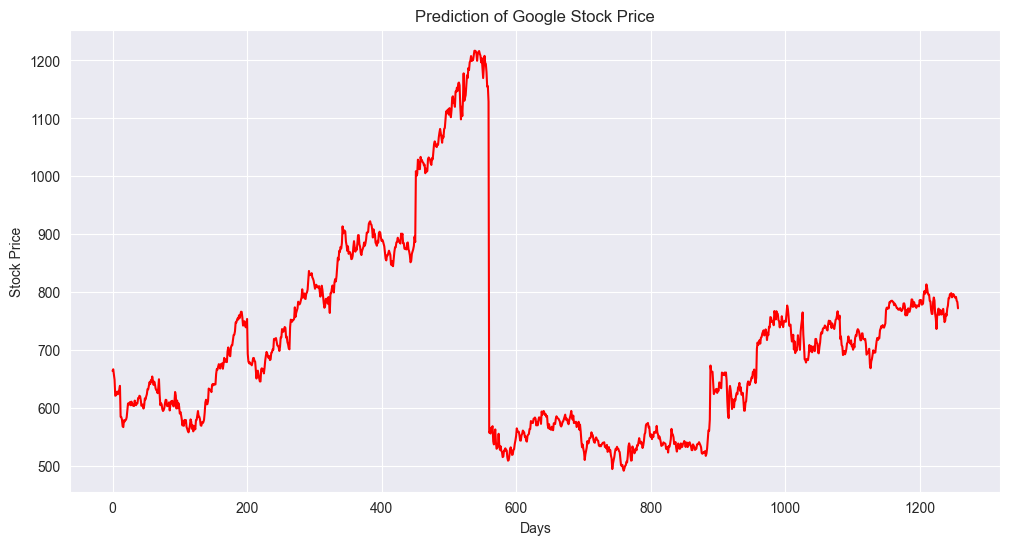

In [227]:

# Plot the graph
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.lineplot(df['Close'], color ='red')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Prediction of Google Stock Price')
plt.show()